## Simple Logistic Perceptron

In [312]:
"""
Implementation of a Perceptron.

A perceptron has one input per feature. i.e. the number of columns in X.
This is a logistic predictor - which will return 1 or -1.

The algorithm is:
Initialise weights(w) to normally distributed random values mean 0, variance 0.1

For the number of iterations
  For every row of X
     dot.product the weights and add the bias
     take this away from the target for that row
     multiply the difference by the learning rate (eta)
     then mulitply this number across all weights
     add this value to the bias
     
Our classifier moves between 1 and -1.

This means the min error is -2 and the max is +2 with a max eta=1
"""

import numpy as np

class Perceptron(object):
    """Perceptron classifier."""

    def __init__(self, eta=0.1, n_iter=50, random_state=42):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
 
    def fit(self, X, y):
        """Fit training data."""
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0,
                              scale=0.1,
                              size=1 + X.shape[1])
        self.errors_ = []
        for iter in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                #print(iter, update)
                self.w_[1:] += update * xi
                self.w_[0]  += update
                errors += int(update != 0.0)
            
            self.errors_.append(errors)
        print("Final weights w_: ", self.w_)
        return self
        
    def net_input(self, X):
        """Calculate net input.
        Calculate the dot product of X and w_.
        Return this plus the bias"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """Return class label after unit step.
        For every row of X, calculate the dot product + bias.
        If it is positive, return 1, else return -1.
        Return these results in an array."""
        return np.where(self.net_input(X)>= 0.0, 1, -1)

In [228]:
p = Perceptron(eta=0.1, n_iter=100)

In [229]:
X = np.array([[1,2,3], [4,5,6], [7,8,9]])
y = np.array([1, -1, 1])

In [230]:
p.fit(X,y)

[-0.55032858  0.58617357  0.06476885 -0.44769701]


In [231]:
p.net_input([1,2,3])

-1.1777083502734824

In [232]:
print(p.predict([1,2,3]))

-1


In [233]:
print(p.predict([4,5,6]))

-1


In [234]:
print(p.predict([7,8,9]))

1


In [235]:
print(p.predict([100,0,0]))

1


In [236]:
# okay - let's train this on real data. The iris dataset
from sklearn.datasets import load_iris

In [237]:
X, y = load_iris(return_X_y=True)
y = np.reshape(y, (150,1))
Xy = np.append(X, y, axis=1)
np.random.shuffle(Xy)

In [238]:
print(Xy)

[[5.8 2.6 4.  1.2 1. ]
 [7.2 3.  5.8 1.6 2. ]
 [5.9 3.  4.2 1.5 1. ]
 [7.7 3.  6.1 2.3 2. ]
 [5.1 3.8 1.5 0.3 0. ]
 [5.4 3.9 1.3 0.4 0. ]
 [5.5 2.5 4.  1.3 1. ]
 [6.7 3.1 5.6 2.4 2. ]
 [6.4 3.2 5.3 2.3 2. ]
 [7.  3.2 4.7 1.4 1. ]
 [5.9 3.2 4.8 1.8 1. ]
 [4.8 3.  1.4 0.3 0. ]
 [4.6 3.6 1.  0.2 0. ]
 [6.5 3.  5.2 2.  2. ]
 [7.7 3.8 6.7 2.2 2. ]
 [5.1 2.5 3.  1.1 1. ]
 [4.9 2.4 3.3 1.  1. ]
 [5.4 3.7 1.5 0.2 0. ]
 [5.7 2.8 4.5 1.3 1. ]
 [6.3 2.9 5.6 1.8 2. ]
 [5.5 2.6 4.4 1.2 1. ]
 [6.1 3.  4.6 1.4 1. ]
 [5.6 2.9 3.6 1.3 1. ]
 [5.  2.  3.5 1.  1. ]
 [5.7 3.8 1.7 0.3 0. ]
 [5.7 2.8 4.1 1.3 1. ]
 [5.2 3.5 1.5 0.2 0. ]
 [6.6 2.9 4.6 1.3 1. ]
 [6.3 3.4 5.6 2.4 2. ]
 [4.7 3.2 1.6 0.2 0. ]
 [6.4 2.7 5.3 1.9 2. ]
 [6.  2.2 4.  1.  1. ]
 [5.6 3.  4.5 1.5 1. ]
 [5.8 2.7 5.1 1.9 2. ]
 [6.  3.  4.8 1.8 2. ]
 [5.1 3.3 1.7 0.5 0. ]
 [6.8 2.8 4.8 1.4 1. ]
 [5.5 4.2 1.4 0.2 0. ]
 [5.8 2.7 3.9 1.2 1. ]
 [5.1 3.8 1.6 0.2 0. ]
 [5.  3.6 1.4 0.2 0. ]
 [5.  3.5 1.6 0.6 0. ]
 [4.9 3.1 1.5 0.1 0. ]
 [6.7 3.1 4

Species:  0


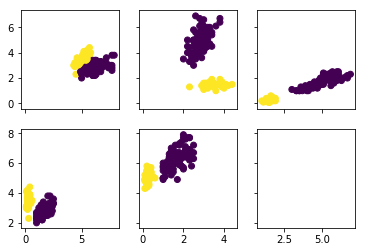

Species:  1


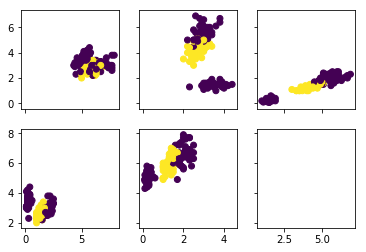

Species:  2


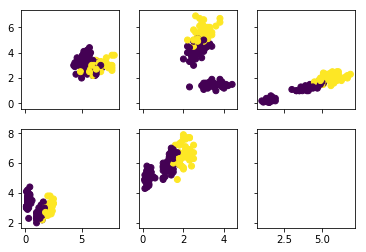

In [389]:
# Let's pick a class to predict
y = []
y.append(np.where(Xy[:,4] == 0, 1, -1))
y.append(np.where(Xy[:,4] == 1, 1, -1))
y.append(np.where(Xy[:,4] == 2, 1, -1))

# let's check if the dimensions are linearly separable
import matplotlib.pyplot as plt
for i in range(3):
    f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='col', sharey='row')
    print('Species: ', i)
    ax1.scatter(Xy[:,0], Xy[:,1], c=y[i])
    ax2.scatter(Xy[:,1], Xy[:,2], c=y[i])
    ax3.scatter(Xy[:,2], Xy[:,3], c=y[i])
    ax4.scatter(Xy[:,3], Xy[:,1], c=y[i])
    ax5.scatter(Xy[:,3], Xy[:,0], c=y[i])
    plt.show()
    
# 0: All 5 dimensions can be seperated linearly and the prediction is 100% accurate
# 1: Isn't linearly seperable on any dimension with one line and the prediction is only 74% accurate
# 2: 4 out of 5 dimensions can be mostly separated linearly and the prediction is 96% accurate

In [304]:
pp.fit(Xy[:100,:4], y[0][:100])
y_hat = pp.predict(Xy[100:,:4])
len(y_hat) - np.equal(y_hat, y[0][100:]).sum()

[ 0.14967142  0.24617357  0.92476885 -1.03769701 -0.62341534]


0

In [305]:
pp.fit(Xy[:100,:4], y[1][:100])
y_hat = pp.predict(Xy[100:,:4])
len(y_hat) - np.equal(y_hat, y[1][100:]).sum()

[ 5.24967142  1.20617357 -5.87523115  2.23230299 -6.88341534]


13

Species:  0


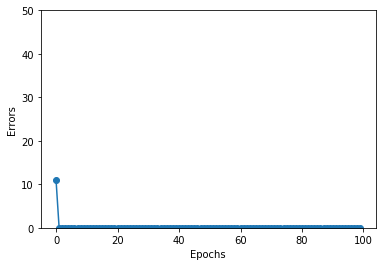

Species:  1


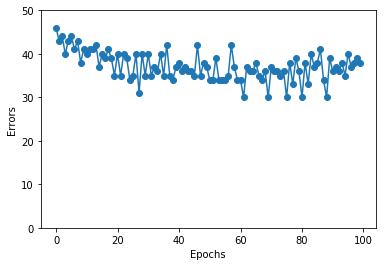

Species:  2


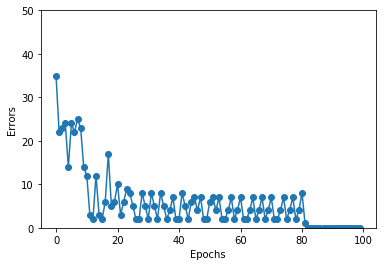

In [345]:
# Let's explore how accuracy changes as we increase iterations
for species in range(3):
    pp = Perceptron(eta=0.3, n_iter=100)
    pp.fit(Xy[:100,:4], y[species][:100])
    y_hat = pp.predict(Xy[100:,:4])
    errors = pp.errors_

    print('Species: ', species)
    plt.plot(errors, marker='o')
    plt.ylim(ymin=0, ymax=50)
    plt.ylabel('Errors')
    plt.xlabel('Epochs')
    plt.show()

## Adaline

In [460]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # setup marker generator color map
    markers = ['s', 'x', 'o', '^', 'v']
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min = X[:, 0].min() - 1
    x1_max = X[:, 0].max() + 1
    x2_min = X[:, 1].min() - 1
    x2_max = X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xmin=xx1.min(), xmax=xx1.max())
    plt.ylim(ymin=xx2.min(), ymax=xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor="black")

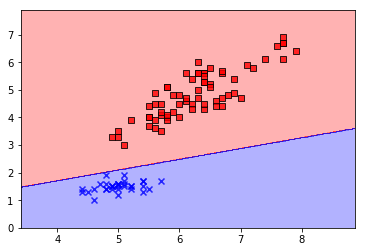

In [461]:
X = Xy[:100,[0,2]]
ppn = pp.fit(X, y[0][:100])
plot_decision_regions(X, y[0][:100], classifier=ppn)

## Adaptive Linear Neurons (Adaline)
The key differenec with Adaline is that the weights are updated based on a linear activation function rather than a unit step. In Adaline, this linear activation function is simply the identity of the net input (i.e. the dot product of the weights and the X row. In this case our error doesn't belong to eta*[2,0,-2] = but is instead linear to the amount of error. If a set of weights gives a small error - we only update the weights a small amount. This helps avoid the oscillation that can occur with a simple Perceptron.

In [533]:
class AdalineGD(object):
    """ADAptive LInear Neuron classifier."""

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0,
                              scale=0.01,
                              size=1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            #print("Errors: ", errors)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0]  += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
            #print("Cost: ", self.cost_)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """Compute linear activation"""
        return X
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0, 1, -1)

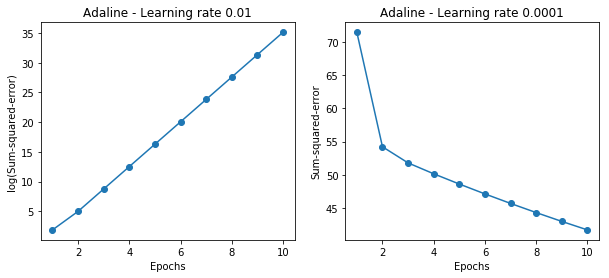

In [535]:
# Demonstrate sensitivity of eta on convergence.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# No convergence
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(Xy[:,[0,2]], y[0])
ax[0].plot(range(1, len(ada1.cost_) + 1), 
           np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

# Convergence
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(Xy[:,[0,2]], y[0])
ax[1].plot(range(1, len(ada2.cost_) + 1), 
          ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

An important factor for convergence is our data. If we normalise our data so that it has mean 0 and variance 1, we achieve much better convergence results.

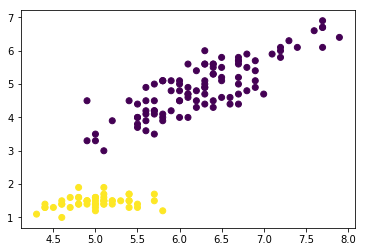

In [529]:
plt.scatter(Xy[:,0], Xy[:,2], c=y[0])
plt.show()

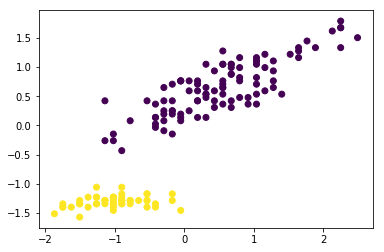

In [530]:
# normalise X to mean 0, variance 1
X_std = np.copy(Xy[:,[0,2]])
X_std[:,0] = (Xy[:,0] - Xy[:,0].mean()) / Xy[:,0].std()
X_std[:,1] = (Xy[:,2] - Xy[:,2].mean()) / Xy[:,2].std()
X_std.shape

y_std = (y[0] - y[0].mean()) / y[0].std()

plt.scatter(X_std[:,0], X_std[:,1], c=y[0])
plt.show()

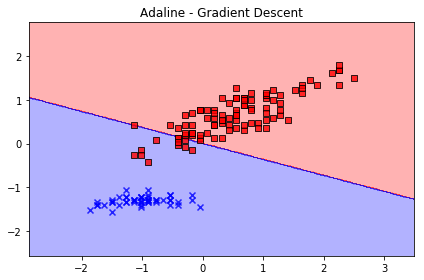

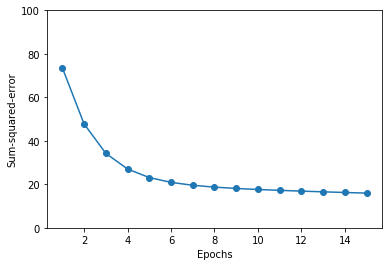

In [532]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y_std)

plot_decision_regions(X_std, y[0], classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.ylim(ymin=0, ymax=100)
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


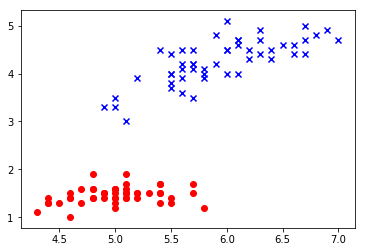

In [574]:
# Check other iris data source
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                'machine-learning-databases/iris/iris.data',
                header=None)
df.iloc[:,[0,2,4]].head(10)
print(df.iloc[:,4].unique())

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0,2]].values

plt.scatter(X[:50,0], X[:50,1],
           color='red', marker='o', label='setosa')
plt.scatter(X[50:100,0], X[50:100,1],
           color='blue', marker='x', label='versicolor')
plt.show()

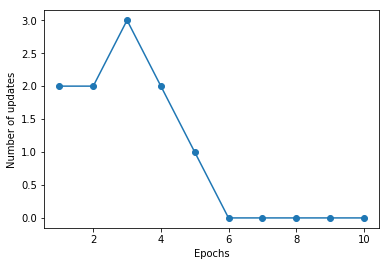

In [576]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) +1),
         ppn.errors_,
         marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

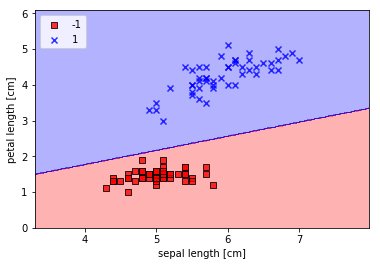

In [578]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

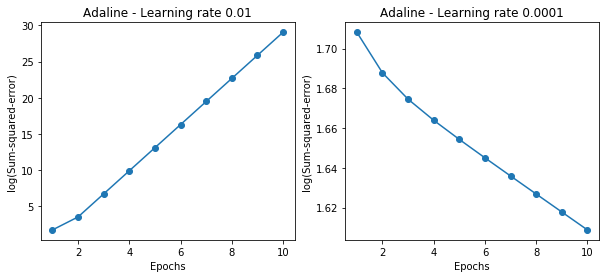

In [581]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[10, 4])
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)

ax[0].plot(range(1, len(ada1.cost_)+1),
          np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_)+1),
          np.log10(ada2.cost_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

In [582]:
X_std = np.copy(X)
X_std[:, 0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:, 1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

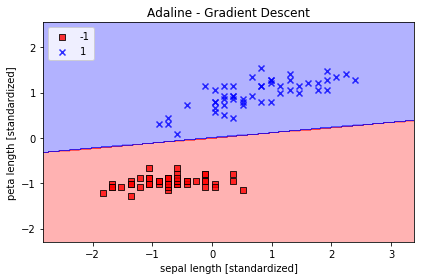

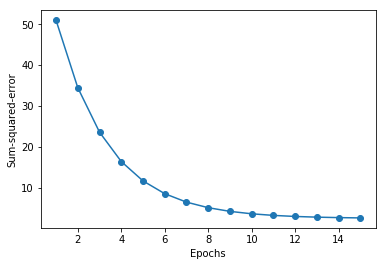

In [584]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('peta length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada.cost_)+1),
         ada.cost_,
         marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

He only included to two varieties. I included all three. Evidently, that makes a big difference to the model convergence. Let's also check if shuffling has an impact.

In [589]:
# prove shuffle breaks model convergence
y_1d = np.reshape(y, (100,1))
Xy = np.append(X, y_1d, axis=1)
np.random.shuffle(Xy)

X_rand = Xy[:,[0,1]]
y_rand = Xy[:,2]

X_rand_std = np.copy(X_rand)
X_rand_std[:,0] = (X_rand[:, 0] - X_rand[:, 0].mean()) / X_rand[:, 0].std()
X_rand_std[:,1] = (X_rand[:, 1] - X_rand[:, 1].mean()) / X_rand[:, 1].std()

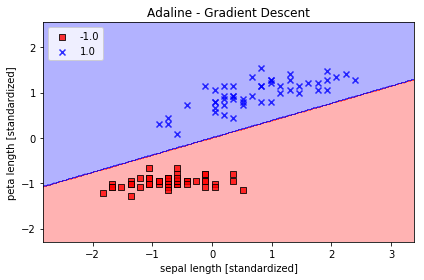

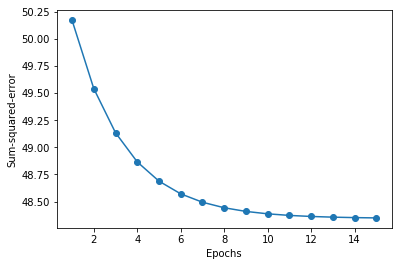

In [591]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_rand_std, y)

plot_decision_regions(X_rand_std, y_rand, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('peta length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada.cost_)+1),
         ada.cost_,
         marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

Yep - shuffling makes the model much slower to converge. If you also include the other species - it is worse again. This is a very interesting feature of simple neural networks I need to be aware of. For classification, sorting the data into the classes and ONLY including easy features appears to be the way to classify. Adding more complexity increases the risk of divergent oscillation.

In [594]:
class AdalineSGD(object):
    """ADAptive LInear Neuron classifier."""

    def __init__(self, eta=0.01, n_iter=50,
                 shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state

    def fit(self, X, y):
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self
    
    def partial_fix(self, X, y):
        """Fit training data without reinitializing weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self.update_weights(X, y)
        return self
    
    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01,
                                   size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0]  += self.eta * error
        cost = 0.5 * error**2
        return cost

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0, 1, -1)

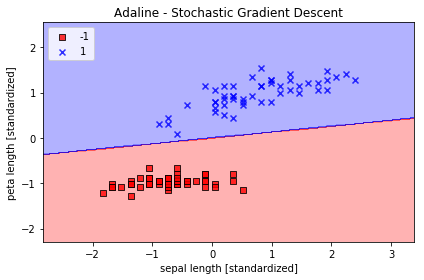

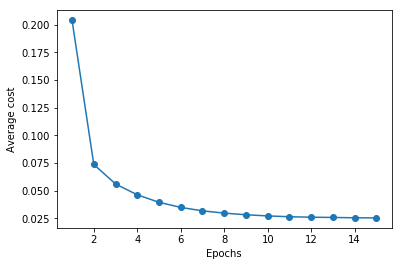

In [598]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('peta length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada.cost_)+1),
         ada.cost_,
         marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average cost')
plt.show()